In [1]:
import pickle
import os
import sys

dir2 = os.path.abspath("")
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path:
    sys.path.append(dir1)
os.chdir("../..")
os.environ['NUMEXPR_NUM_THREADS'] = '10'

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
random_state = 1234

Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (0)
libgomp: Invalid value for environment variable OMP_NUM_THREADS


In [3]:
X = pd.read_csv(os.path.join("results", "datasets_statistics", "Datafeatures_and_metrics.csv"), index_col=False)

In [4]:
X_train = X[X.columns.difference(['Value','Dataset', 'Method', 'Method_Encoded',])].astype(float)
y_train = X['Value']

In [5]:
X_train = X_train[['SpaceSize', 'Shape', 'Density', 'Nu', 'Ni', 'Nr', 'Rpu', 'Rpi', 'Giniu', 'Ginii', 'APB', 'StPB', 'SkPB', 'KuPB', 'LTavg', 'LTstd', 'LTsk','LTku']]

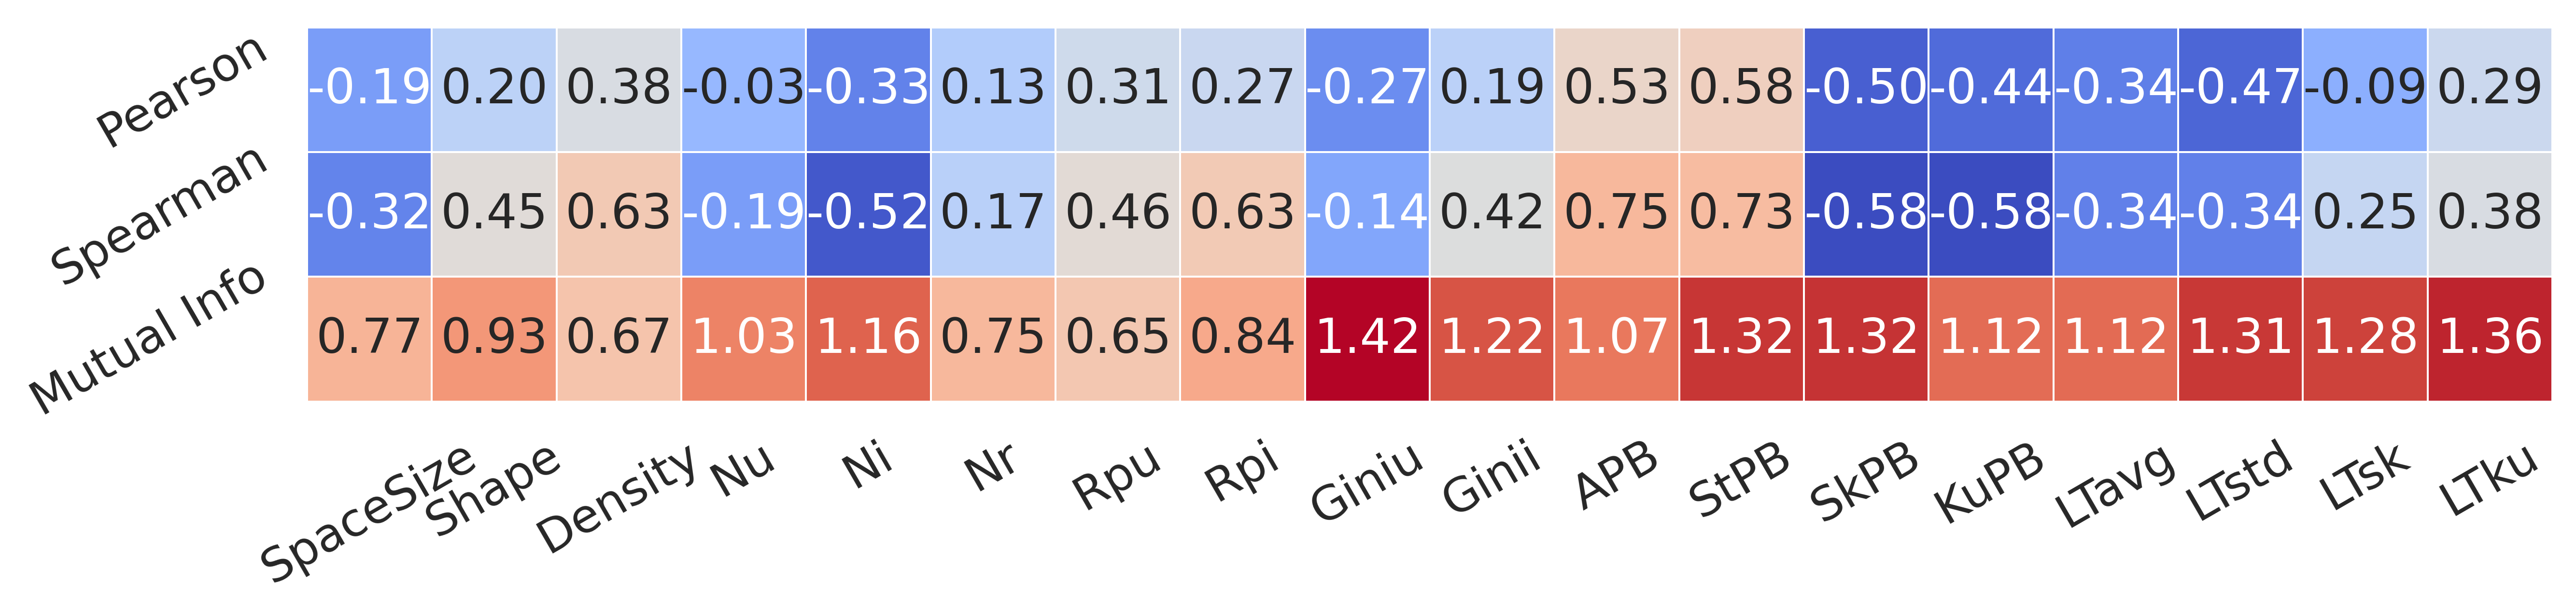

In [40]:
# Calculate correlations
pearson_corr = X_train.corrwith(y_train)
spearman_corr = X_train.corrwith(y_train, method='spearman')
mutual_info = pd.Series(mutual_info_regression(X_train, y_train), index=X_train.keys())

# Combine the three correlation matrices into one dataframe
combined_corr = pd.concat([pearson_corr, spearman_corr, mutual_info], axis=1)
combined_corr.columns = ['Pearson', 'Spearman', 'Mutual Info']

# Transpose the combined_corr DataFrame
transposed_corr = combined_corr.T

# Set a high DPI for better resolution
plt.figure(figsize=(12, 14), dpi=500)

# Customize the color palette to "coolwarm"
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create the correlation matrix heatmap as horizontal
ax = sns.heatmap(transposed_corr, annot=True, cmap=cmap, fmt=".2f", linewidths=0.3, square=True,
            cbar=False, cbar_kws={'orientation': 'horizontal'}) 

# Customize tick labels and font size
plt.xticks(fontsize=14, rotation=30)
plt.yticks(fontsize=14, rotation=30)  # Rotate y-axis labels to be horizontal

# Add a frame to the heatmap
ax.set_facecolor('lightgray')
plt.savefig(os.path.join("results", "datasets_statistics", "correlations.pdf") , bbox_inches='tight')
# Show the plot
plt.show()

In [7]:
df = X

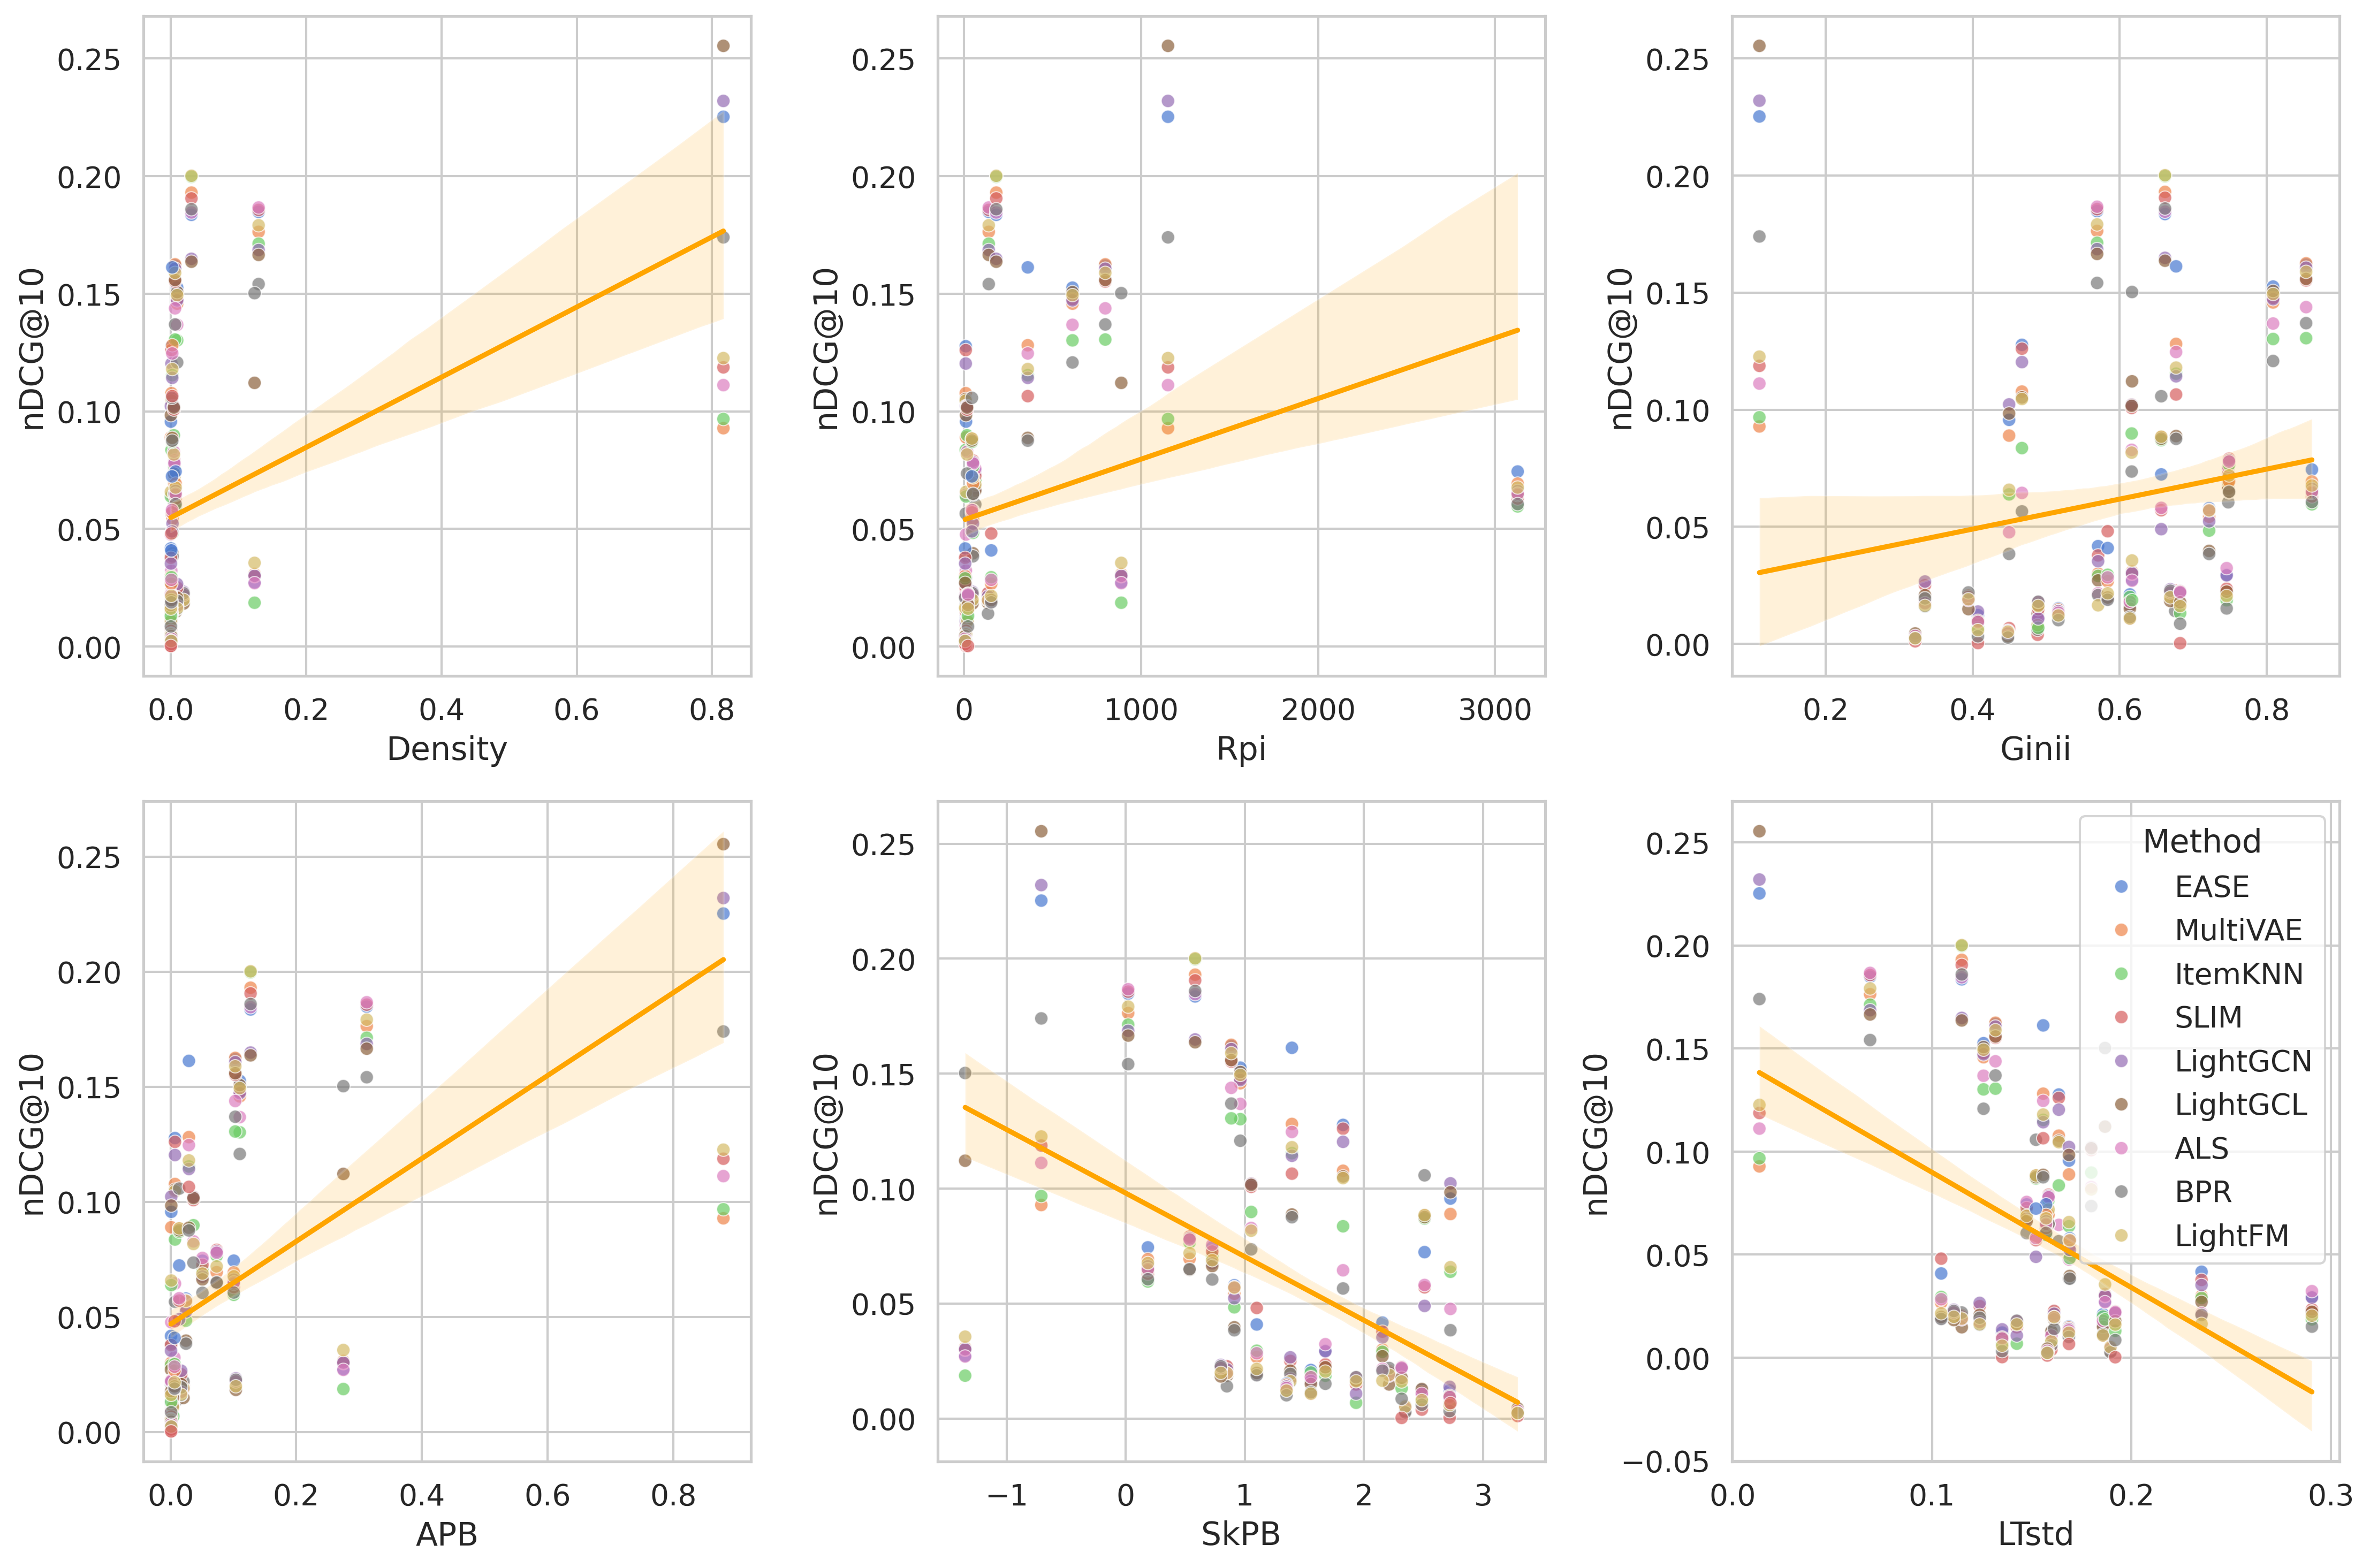

In [8]:
# List of columns to create scatter plots for (excluding 'Value' column)
features = ['Density', 'Rpi', 'Ginii', 'APB', 'SkPB', 'LTstd']

# Create a grid of scatter plots
sns.set(style="whitegrid", font_scale=1.2)
sns.set_palette("viridis")
plt.figure(figsize=(15, 10), dpi=300)

for i, feature in enumerate(features, 1):
    legend_arg = False
    if i == 6:
        legend_arg = True
    plt.subplot(2, 3, i)
    sns.scatterplot(x=feature, y='Value', hue='Method', data=df, alpha=0.7, legend=legend_arg,  palette="muted")
    sns.regplot(x=feature, y='Value', data=df, scatter=False, color='purple', line_kws={"color": "orange"})
    # plt.title(f'Scatter Plot of Value vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('nDCG@10')
    

plt.tight_layout()
plt.savefig(os.path.join("results", "datasets_statistics", "metrics_per_feature.pdf") , bbox_inches='tight')
plt.show()